In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = LabelEncoder()

data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [5]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [6]:
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

## Visualization :--

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

Text(0.5, 1.0, 'Boxplot for Age')

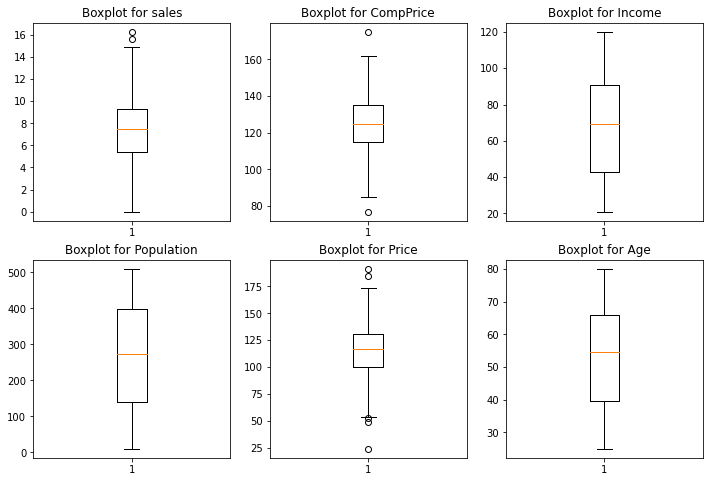

In [10]:
# Boxplot :-

fig , ax =  plt.subplots(2,3, figsize=[12,8])

ax[0][0].boxplot(data.Sales)
ax[0][0].set_title("Boxplot for sales")

ax[0][1].boxplot(data.CompPrice)
ax[0][1].set_title("Boxplot for CompPrice")

ax[0][2].boxplot(data.Income)
ax[0][2].set_title("Boxplot for Income")


ax[1][0].boxplot(data.Population)
ax[1][0].set_title("Boxplot for Population")

ax[1][1].boxplot(data.Price)
ax[1][1].set_title("Boxplot for Price")

ax[1][2].boxplot(data.Age)
ax[1][2].set_title("Boxplot for Age")

Text(0.5, 1.0, 'histogram for Age')

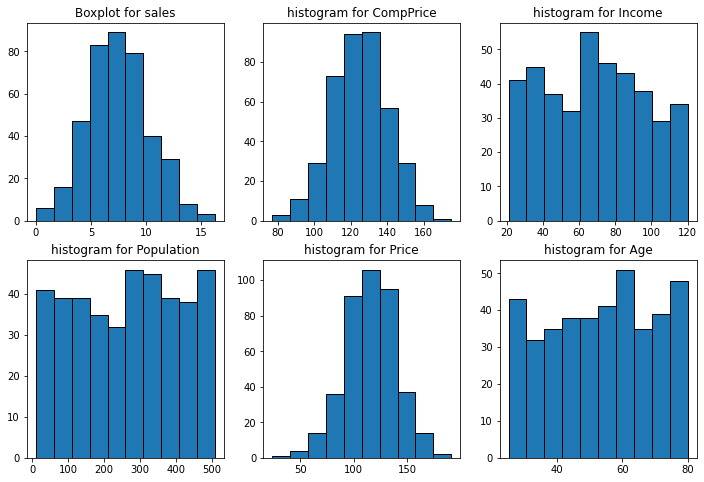

In [14]:
# Histograms plots :--

fig ,ax = plt.subplots(2,3, figsize=[12,8])

ax[0][0].hist(data.Sales, edgecolor='Black')
ax[0][0].set_title("Boxplot for sales")

ax[0][1].hist(data.CompPrice,edgecolor='Black')
ax[0][1].set_title("histogram for CompPrice")

ax[0][2].hist(data.Income,edgecolor='Black')
ax[0][2].set_title("histogram for Income")


ax[1][0].hist(data.Population,edgecolor='Black')
ax[1][0].set_title("histogram for Population")

ax[1][1].hist(data.Price,edgecolor='Black')
ax[1][1].set_title("histogram for Price")

ax[1][2].hist(data.Age,edgecolor='Black')
ax[1][2].set_title("histogram for Age")

### from above plots we can see that Price , Sales and companyprice has normal distribution .

 ## Some Data preprocessing :--

In [20]:
data['high_sale'] = data.Sales.map(lambda x :1 if x>=9 else 0)

In [39]:
data['high_sale'].value_counts()

0    286
1    114
Name: high_sale, dtype: int64

In [40]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high_sale
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


## Train Test Split :--

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

In [25]:
x_train , x_test, y_train , y_test = train_test_split(X,Y, test_size=0.30)

In [31]:
print("Our training data input size is " , x_train.shape)
print("Our testing data input size is " , x_test.shape)

Our training data input size is  (280, 10)
Our testing data input size is  (120, 10)


## Model Building :--

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()

In [37]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
pred1 = model.predict(x_test)

## Checking the accuracy :-- 

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
accu_pred1 = accuracy_score(y_test, pred1)
print("The model accuracy is :-- ", accu_pred1)

The model accuracy is :--  0.8083333333333333


### We will check the accuracy  using KFold cross validation  :-

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
kfold = KFold(n_splits=10)
result = cross_val_score(model, X, Y, cv=kfold)

In [48]:
print("The model accuracy using k-fold is :-- ", result.mean())

The model accuracy using k-fold is :--  0.8300000000000001


## Lets do some hyperparameter Tunning :-- 

In [51]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [50]:
model = RandomForestClassifier()

In [53]:
parameters = {
              'n_estimators' : np.array(range(50,401,50)),
              'criterion' : np.array(['gini','entropy']),
              'min_samples_split' : np.array([2,4,6,8])

                                        }

In [55]:
fin_model = GridSearchCV(estimator=model, param_grid=parameters, n_jobs= -1)
fin_model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': array(['gini', 'entropy'], dtype='<U7'),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])})

In [58]:
pred2 = fin_model.predict(x_test)

In [59]:
accu_pred2 = accuracy_score(y_test, pred2)
print("The model accuarcy after doing the hyper parameter tunning is :-- ", accu_pred2)

The model accuarcy after doing the hyper parameter tunning is :--  0.8


In [61]:
kfold = KFold(n_splits=10)
result2 = cross_val_score(fin_model, X, Y, cv=kfold)

In [62]:
print("The model accuracy using k-fold and doing hypermater tuning is :-- ", result2.mean())

The model accuracy using k-fold and doing hypermater tuning is :--  0.8375


In [64]:
### our best parameters are :--

fin_model.best_params_

{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 300}

## Our accuarcy is increased from 0.830 to 0.8375 by doing hyperparameter tuning .